In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#An Analysis of Vehicle Sales Data in the US

In this notebook, we will be exploring the "Vehicles_us.csv" that contains data related to US vehicle sales over an extended period of time. 

In [2]:
file_path = "vehicles_us.csv"
df = pd.read_csv(file_path)
print(df.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  


In [3]:
duplicated = df.duplicated().sum()
print(duplicated)

0


There are no duplicates

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
model_counts = df['model'].value_counts()
model_yr_counts = df['model_year'].value_counts()

print(model_counts)
print(model_yr_counts)


model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64
model_year
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: count, Length: 68, dtype: int64


This step was to get a clear picture as to the top vehicle makes, as well as where the majority of the model_years will be coming from

In [6]:
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64


How I will go about this:

- Going to drop the is_4wd column. Fifty percent of the values are missing, and its most likely not that important to our data
- Replacing missing paint_color values with unknown
- Replacing missing model_year values with the median value of the column
- Replacing missing odometer values with the median mileage
- Replacing missing cylinder values with the mode 


In [7]:
df.drop(columns=['is_4wd'], inplace=True)

median_model_year = df.groupby('model')['model_year'].transform('median')
df['model_year'].fillna(median_model_year, inplace=True)

df['paint_color'].fillna('Unknown', inplace=True)

df['odometer'] = df.groupby('model_year')['odometer'].transform(
    lambda x: x.fillna(x.median())
    )

df['odometer'].fillna(df['odometer'].median(), inplace=True)

df['cylinders'] = df.groupby('type')['cylinders'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))


print(df.isnull().sum())


price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
date_posted     0
days_listed     0
dtype: int64


C:\Users\Chris\AppData\Local\Temp\ipykernel_19496\2650424528.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model_year'].fillna(median_model_year, inplace=True)
C:\Users\Chris\AppData\Local\Temp\ipykernel_19496\2650424528.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  date_posted   51525 non-null  object 
 11  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 4.7+ MB


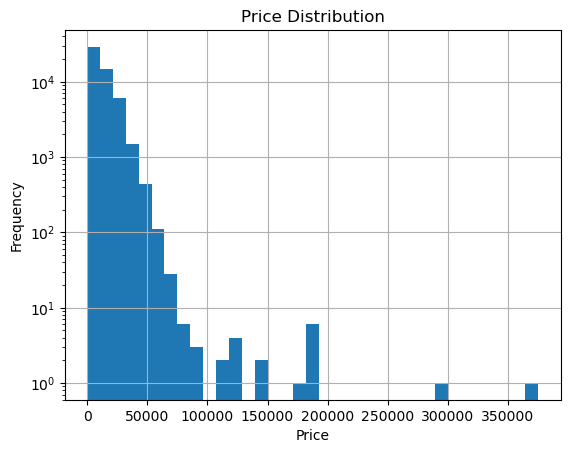

In [9]:
df['price'].hist(bins=35, log=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


This graph is used to show the Price Distribution of the cars included inside our csv file. This gives us a better idea of what the most common prices of cars are. 

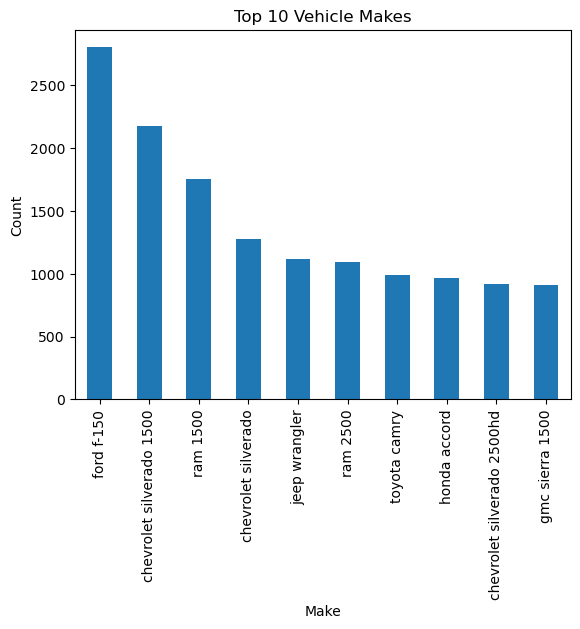

In [10]:

df['model'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

Informatiom about the most popular vehicle models.

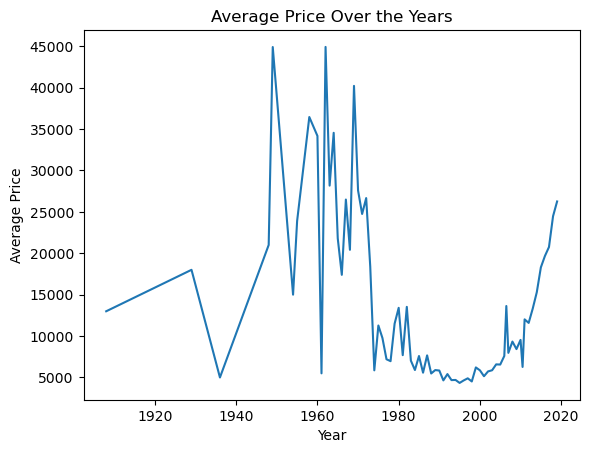

In [11]:
df.groupby('model_year')['price'].mean().plot()
plt.title('Average Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

I don't like this because, most likely there are only a few cars bought in the 1950-1970 timespan and they were expensive cars, so they skew the graph data

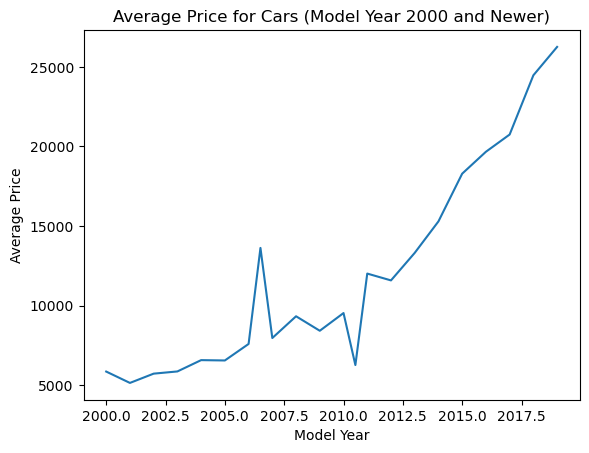

In [12]:
import matplotlib.pyplot as plt

filtered_df = df[df['model_year'] >= 2000]

filtered_df.groupby('model_year')['price'].mean().plot()

# Plot the results
plt.title('Average Price for Cars (Model Year 2000 and Newer)')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.show()


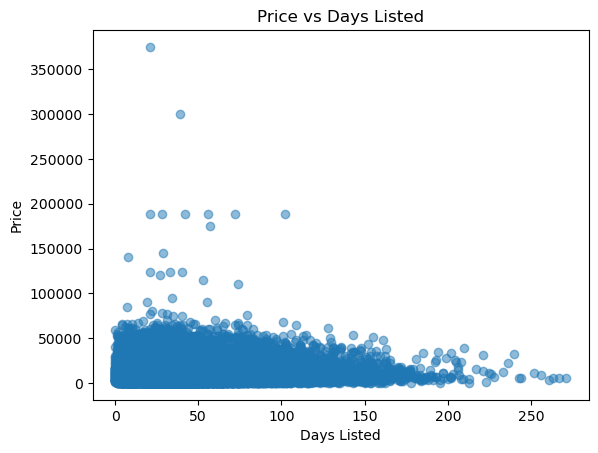

In [13]:
plt.scatter(df['days_listed'], df['price'], alpha=0.5)
plt.title('Price vs Days Listed')
plt.xlabel('Days Listed')
plt.ylabel('Price')
plt.show()

Attempted to see if there was a strong correlation between the price of a car, and the days it was listed on market. 

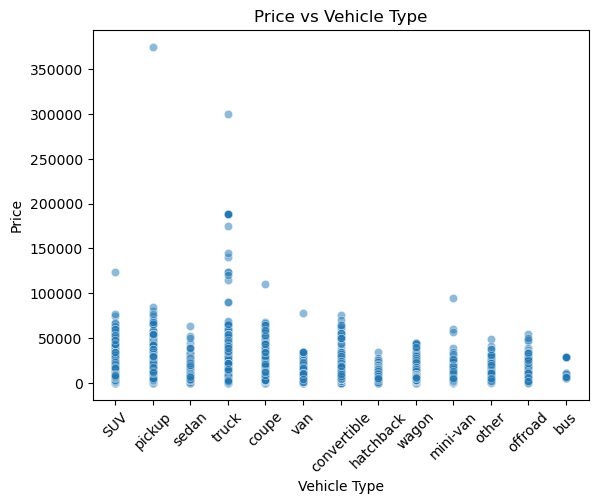

In [14]:
import seaborn as sns

sns.scatterplot(data=df, x='type', y='price', alpha=0.5)
plt.title('Price vs Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Good information displaying what the typical price ranges look like for each type of vehicle.

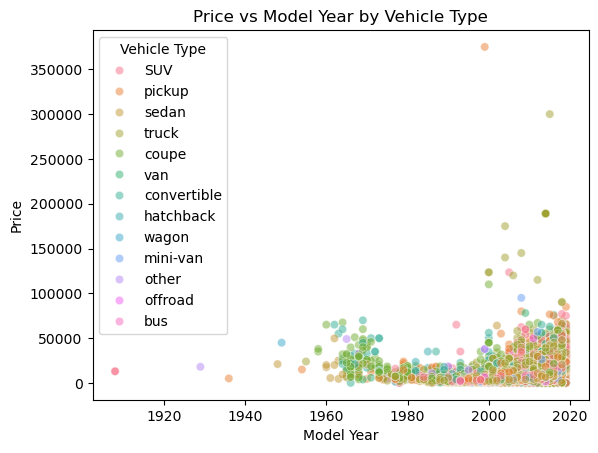

In [15]:
sns.scatterplot(data=df, x='model_year', y='price', hue='type', alpha=0.5)
plt.title('Price vs Model Year by Vehicle Type')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.legend(title='Vehicle Type')
plt.show()

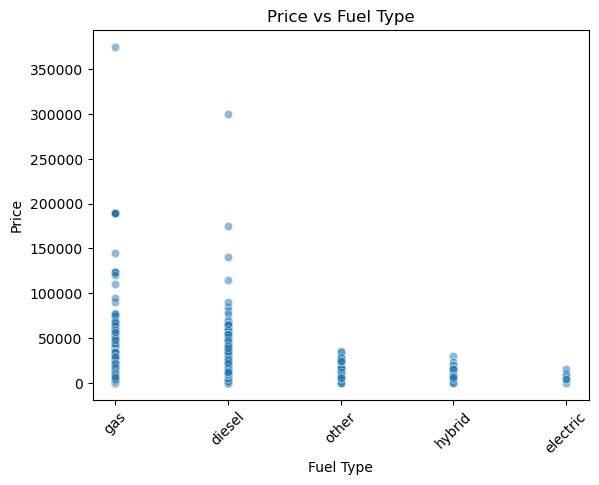

In [16]:
sns.scatterplot(data=df, x='fuel', y='price', alpha=0.5)
plt.title('Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

#Conclusion

After doing some analysis on our dataset, we can come up with the following inferences:

- Gas vehicles still tend to have the highest prices, however this could be due to them being around the longest, and having the most data to work from
- The most expensive model types tend to be trucks
- Cars have become significantly more expensive in the 24 years since the start of the 21st century